# Assignment 2
The objective of this assignment is to get you familiarizewith  the  problems  of  `classification`  and  `verification`with a popular problem space of `face`

This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Allowed Libraries
- All libraries are allowed 

## Datasets 
- 3 datasets are provided. Load the data from the drive [link](!https://drive.google.com/file/d/1ujsKv9W5eidb4TXt1pnsqwDKVDFtzZTh/view?usp=sharing).
- Unzip the downloaded file and store the files in a folder called `datasets`. Keep the `datasets` folder in the same directory as of the jupyter notebook 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.
- Upload  the  notebook,  report  and  classification  results as a zip file to moodle. Name the zip file as `<rollnumber>_assignment2.zip`

In [1]:
# Installing Libraries
!pip install scikit-learn matplotlib Pillow

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# Basic Imports
import os
import sys
import warnings
import numpy as  np
import pandas as pd
from scipy import linalg
import seaborn as sn

# Loading and plotting data
from PIL import Image
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Features
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import _class_means,_class_cov
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.manifold import Isomap

plt.ion()
%matplotlib inline

# Parameters
- Image size: Bigger images create better representation but would require more computation. Choose the correct image size based on your Laptop configuration. 
- is_grayscale: Should you take grayscale images? Or rgb images? Choose whichever gives better representation for classification. 

In [3]:
opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

### Load Dataset

In [4]:
cfw_dict = {'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7}

imfdb_dict = {'MadhuriDixit': 0,
     'Kajol': 1,
     'SharukhKhan': 2,
     'ShilpaShetty': 3,
     'AmitabhBachan': 4,
     'KatrinaKaif': 5,
     'AkshayKumar': 6,
     'Amir': 7}

# Load Image using PIL for dataset
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

# Load the full data from directory
def load_data(dir_path):
    image_list = []
    y_list = []
    
    if "CFW" in dir_path:
        label_dict = cfw_dict

    elif "yale" in dir_path.lower():
        label_dict = {}
        for i in range(15):
            label_dict[str(i+1)] = i
    elif "IMFDB" in dir_path:
        label_dict = imfdb_dict
    else:
        raise KeyError("Dataset not found.")
    
    
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue

    image_list = np.array(image_list)
    y_list = np.array(y_list)

    print("Dataset shape:",image_list.shape)

    return image_list,y_list

# Display N Images in a nice format
def disply_images(imgs,classes,row=1,col=2,w=64,h=64):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

In [5]:
# Loading the dataset
# eg.
dirpath = './dataset/IMFDB/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

dirpath = ['./dataset/IMFDB/', './dataset/IIIT-CFW/', './dataset/Yale_face_database/']
X_IMFDB,y_IMFDB = load_data(dirpath[0])
N_IMFDB,H_IMFDB,W_IMFDB = X_IMFDB.shape[0:3]
C_IMFDB = 1 if opt['is_grayscale'] else X_IMFDB.shape[3]

X_CFW,y_CFW = load_data(dirpath[1])
N_CFW,H_CFW,W_CFW = X_CFW.shape[0:3]
C_CFW = 1 if opt['is_grayscale'] else X_CFW.shape[3]

X_yale,y_yale = load_data(dirpath[2])
N_yale,H_yale,W_yale = X_yale.shape[0:3]
C_yale = 1 if opt['is_grayscale'] else X_yale.shape[3]

Dataset shape: (400, 32, 32, 3)
Dataset shape: (400, 32, 32, 3)
Dataset shape: (672, 32, 32, 3)
Dataset shape: (165, 32, 32, 3)


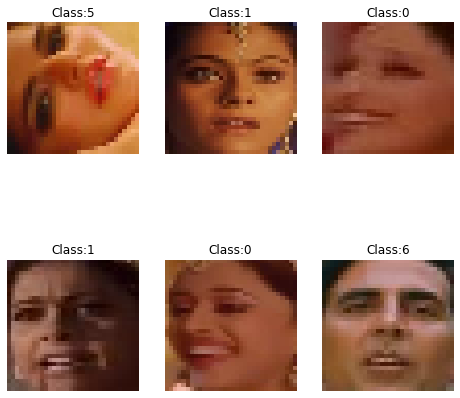

In [6]:
# Show sample images
ind = np.random.randint(0,y.shape[0],6)
disply_images(X[ind,...],y[ind], row=2,col=3)

Dataset: IMFDB


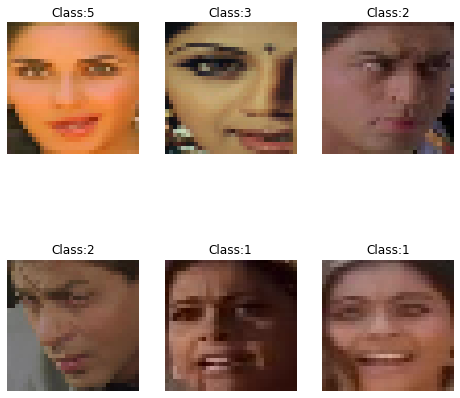

Dataset: CFW


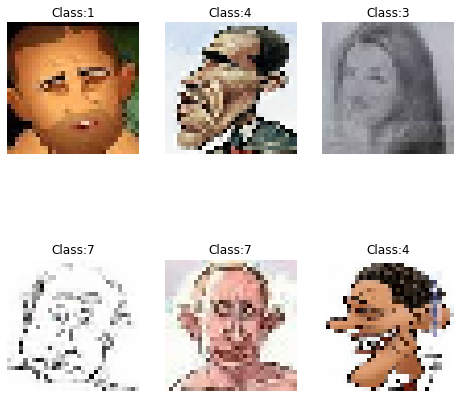

Dataset: Yale


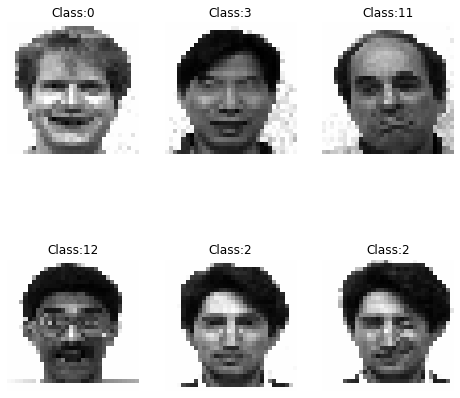

In [7]:
# Show sample images
ind = np.random.randint(0,y_IMFDB.shape[0],6)
print("Dataset: IMFDB")
disply_images(X_IMFDB[ind,...],y_IMFDB[ind], row=2,col=3)

# Show sample images
ind = np.random.randint(0,y_CFW.shape[0],6)
print("Dataset: CFW")
disply_images(X_CFW[ind,...],y_CFW[ind], row=2,col=3)

# Show sample images
ind = np.random.randint(0,y_yale.shape[0],6)
print("Dataset: Yale")
disply_images(X_yale[ind,...],y_yale[ind], row=2,col=3)

# Features
    You are provided 6 Features. These features are:
   - Eigen Faces / PCA 
   - Kernel PCA
   - Fisher Face / LDA
   - Kernel Fisher Face
   - VGG Features 
   - Resnet Features

**VGG and Resnet features are last layer features learned by training a model for image classification**
    
---


In [8]:
# Flatten to apply PCA/LDA
X = X.reshape((N,H*W*C))

In [9]:
# Flatten to apply PCA/LDA
X_IMFDB = X_IMFDB.reshape((N_IMFDB,H_IMFDB*W_IMFDB*C_IMFDB))
X_CFW = X_CFW.reshape((N_CFW,H_CFW*W_CFW*C_CFW))
X_yale = X_yale.reshape((N_yale,H_yale*W_yale*C_yale))

###  1. Eigen Face:
Use principal component analysis to get the eigen faces. 
Go through the [documentation](!http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on how to use it

In [10]:
def get_pca(X,k):
    """
        Get PCA of K dimension using the top eigen vectors 
    """
    pca = PCA(n_components=k)
    X_k = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_k)
    return X_k, X_reconstructed

###  2. Kernel Face:
Use Kernel principal component analysis to get the eigen faces. 

There are different kernels that can be used. Eg. Poly, rbf, sigmoid. Choose the whichever gives the best result or representation. See [link](!https://data-flair.training/blogs/svm-kernel-functions/) for better understanding of these kernels  

Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA) on how to use it different kernels in Sklearn. 

In [11]:
def get_kernel_pca(X, k, kernel='rbf', degree=3):
    """
        Get PCA of K dimension using the top eigen vectors 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use (“linear” | “poly” | “rbf” | “sigmoid” | “cosine” )
        @param: d => Degree for poly kernels. Ignored by other kernels
    """
    kpca = KernelPCA(n_components=k,kernel=kernel,degree=degree, fit_inverse_transform=True)
    X_k = kpca.fit_transform(X)
    X_reconstructed = kpca.inverse_transform(X_k)
    return X_k, X_reconstructed

### 3. Fisher Face
Another method similar to the eigenface technique is `fisherfaces` which uses linear discriminant analysis.
This method for facial recognition is less sensitive to variation in lighting and pose of the face than using eigenfaces. Fisherface uses labelled data to retain more of the class-specific information during the dimension reduction stage.

Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) on how to use it different kernels in Sklearn. 

In [12]:
def get_lda(X, y, k):
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
    """
    lda = LDA(n_components=k)
    X_k = lda.fit_transform(X,y)
    return X_k

### 4. Kernel Fisher Face
Use LDA using different kernels similiar to KernelPCA. Here the input is directly transformed instead of using the kernel trick.  

In [13]:
def get_kernel_lda(X, y, k, kernel='rbf', degree=3):
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use ( “poly” | “rbf” | “sigmoid”)
    """
    # Transform  input
    if kernel == "poly":
        X_transformed = X**degree
    elif kernel == "rbf":
        var = np.var(X)
        X_transformed= np.exp(-X/(2*var))
    elif kernel == "sigmoid":
        X_transformed = np.tanh(X)
    else: 
        raise NotImplementedError("Kernel {} Not defined".format(kernel))
        
    klda = LDA(n_components=k)
    X_k = klda.fit_transform(X_transformed,y)
    return X_k

### 5. VGG Features
VGG Neural Networks a 19 layer CNN architecture introduced by Andrew Zisserman([Link](!https://arxiv.org/pdf/1409.1556.pdf) to paper). We are providing you with the last fully connected layer of this model.

The model was trained for face classification on each dataset and each feature the dimension of 4096.

In [14]:
def get_vgg_features(dirpath):
    features = np.load(os.path.join(dirpath,"VGG19_features.npy"))
    return features

### 6. Resnet Features

[Residual neural networks](!https://arxiv.org/pdf/1512.03385.pdf) are CNN with large depth, to effectively train these netwrorks they utilize skip connections, or short-cuts to jump over some layers. This helps solving [vanishing gradient problem](!https://en.wikipedia.org/wiki/Vanishing_gradient_problem) 

A 50 layer resnet model was trained for face classification on each dataset. Each feature the dimension of 2048

In [15]:
def get_resnet_features(dirpath):
    features = np.load(os.path.join(dirpath,"resnet50_features.npy"))
    return features

# Questions

1(a). What are eigen faces? 

Eign faces are a set of vectors which help to visualise images in a compressed form. They form a set of basis vectors to represent a set of images.

___________________________


1(b).  How many eigen vec-tors/faces are required to “satisfactorily” reconstruct a  person  in  these  three  datasets? (Don’t  forget  to make your argument based on eigen value spectrum) Show appropriate graphs, qualitative examples andmake a convincing argument.

In [16]:
# Compute your features 
# eg.
X_IMFDB_pca, X_IMFDB_recon_pca = get_pca(X_IMFDB, 60)
X_IMFDB_kpca, X_IMFDB_recon_kpca = get_kernel_pca(X_IMFDB, 60)
X_IMFDB_lda = get_lda(X_IMFDB,y_IMFDB,7)
X_IMFDB_klda = get_kernel_lda(X_IMFDB,y_IMFDB,7)
X_IMFDB_vgg = get_vgg_features(dirpath[0])
X_IMFDB_resnet = get_resnet_features(dirpath[0])

X_CFW_pca, X_CFW_recon_pca = get_pca(X_CFW, 75)
X_CFW_kpca, X_CFW_recon_kpca = get_kernel_pca(X_CFW, 75)
X_CFW_lda = get_lda(X_CFW,y_CFW,7)
X_CFW_klda = get_kernel_lda(X_CFW,y_CFW,7)
X_CFW_vgg = get_vgg_features(dirpath[1])
X_CFW_resnet = get_resnet_features(dirpath[1])

X_yale_pca, X_yale_recon_pca = get_pca(X_yale, 40)
X_yale_kpca, X_yale_recon_kpca = get_kernel_pca(X_yale, 40)
X_yale_lda = get_lda(X_yale,y_yale,14)
X_yale_klda = get_kernel_lda(X_yale,y_yale,314)
X_yale_vgg = get_vgg_features(dirpath[2])
X_yale_resnet = get_resnet_features(dirpath[2])

/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_cla

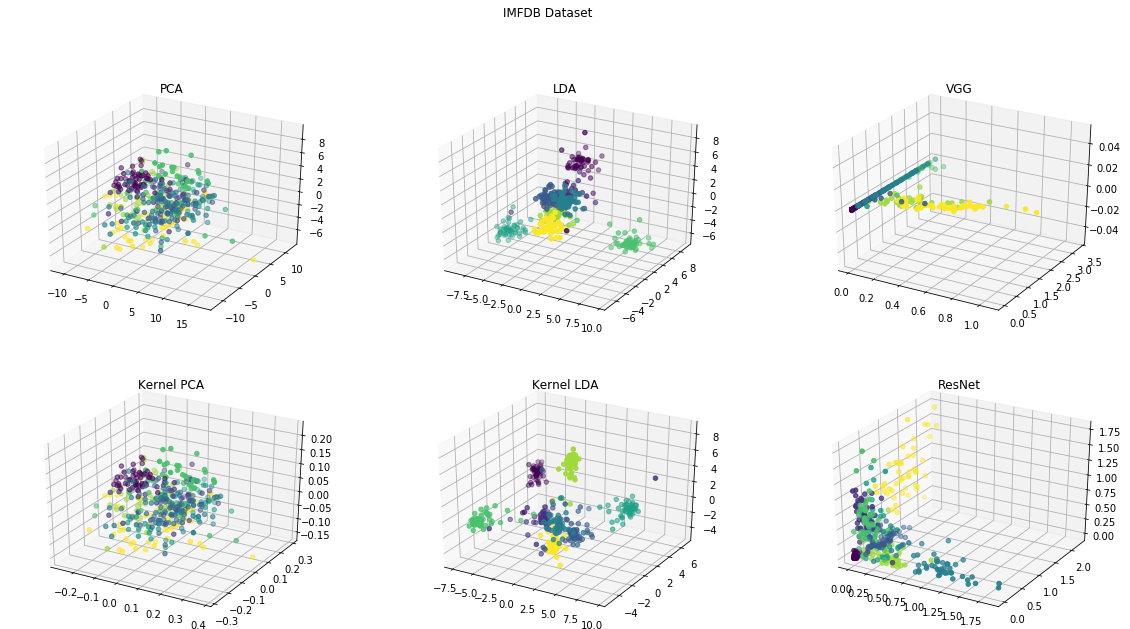

In [17]:
# Create a scatter plot  
# eg.
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(231, projection='3d')
ax.set_title("PCA")
ax.scatter(X_IMFDB_pca[:,0],X_IMFDB_pca[:,1],X_IMFDB_pca[:,2],c=y_IMFDB)

ax = fig.add_subplot(234, projection='3d')
ax.set_title("Kernel PCA")
ax.scatter(X_IMFDB_kpca[:,0],X_IMFDB_kpca[:,1],X_IMFDB_kpca[:,2],c=y_IMFDB)

ax = fig.add_subplot(232, projection='3d')
ax.set_title("LDA")
ax.scatter(X_IMFDB_lda[:,0],X_IMFDB_lda[:,1],X_IMFDB_lda[:,2],c=y_IMFDB)

ax = fig.add_subplot(235, projection='3d')
ax.set_title("Kernel LDA")
ax.scatter(X_IMFDB_klda[:,0],X_IMFDB_klda[:,1],X_IMFDB_klda[:,2],c=y_IMFDB)

ax = fig.add_subplot(233, projection='3d')
ax.set_title("VGG")
ax.scatter(X_IMFDB_vgg[:,0],X_IMFDB_vgg[:,1],X_IMFDB_vgg[:,2],c=y_IMFDB)

ax = fig.add_subplot(236, projection='3d')
ax.set_title("ResNet")
ax.scatter(X_IMFDB_resnet[:,0],X_IMFDB_resnet[:,1],X_IMFDB_resnet[:,2],c=y_IMFDB)
plt.suptitle("IMFDB Dataset")
plt.show()

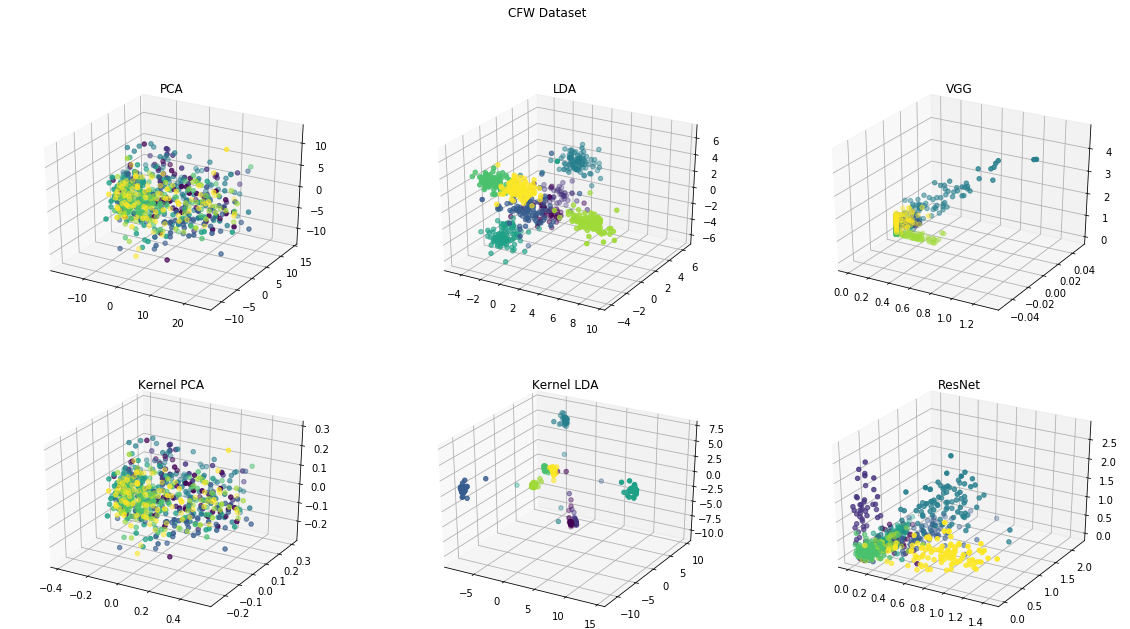

In [18]:
# Create a scatter plot  
# eg.
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(231, projection='3d')
ax.set_title("PCA")
ax.scatter(X_CFW_pca[:,0],X_CFW_pca[:,1],X_CFW_pca[:,2],c=y_CFW)

ax = fig.add_subplot(234, projection='3d')
ax.set_title("Kernel PCA")
ax.scatter(X_CFW_kpca[:,0],X_CFW_kpca[:,1],X_CFW_kpca[:,2],c=y_CFW)

ax = fig.add_subplot(232, projection='3d')
ax.set_title("LDA")
ax.scatter(X_CFW_lda[:,0],X_CFW_lda[:,1],X_CFW_lda[:,2],c=y_CFW)

ax = fig.add_subplot(235, projection='3d')
ax.set_title("Kernel LDA")
ax.scatter(X_CFW_klda[:,0],X_CFW_klda[:,1],X_CFW_klda[:,2],c=y_CFW)

ax = fig.add_subplot(233, projection='3d')
ax.set_title("VGG")
ax.scatter(X_CFW_vgg[:,0],X_CFW_vgg[:,1],X_CFW_vgg[:,2],c=y_CFW)

ax = fig.add_subplot(236, projection='3d')
ax.set_title("ResNet")
ax.scatter(X_CFW_resnet[:,0],X_CFW_resnet[:,1],X_CFW_resnet[:,2],c=y_CFW)
plt.suptitle("CFW Dataset")
plt.show()

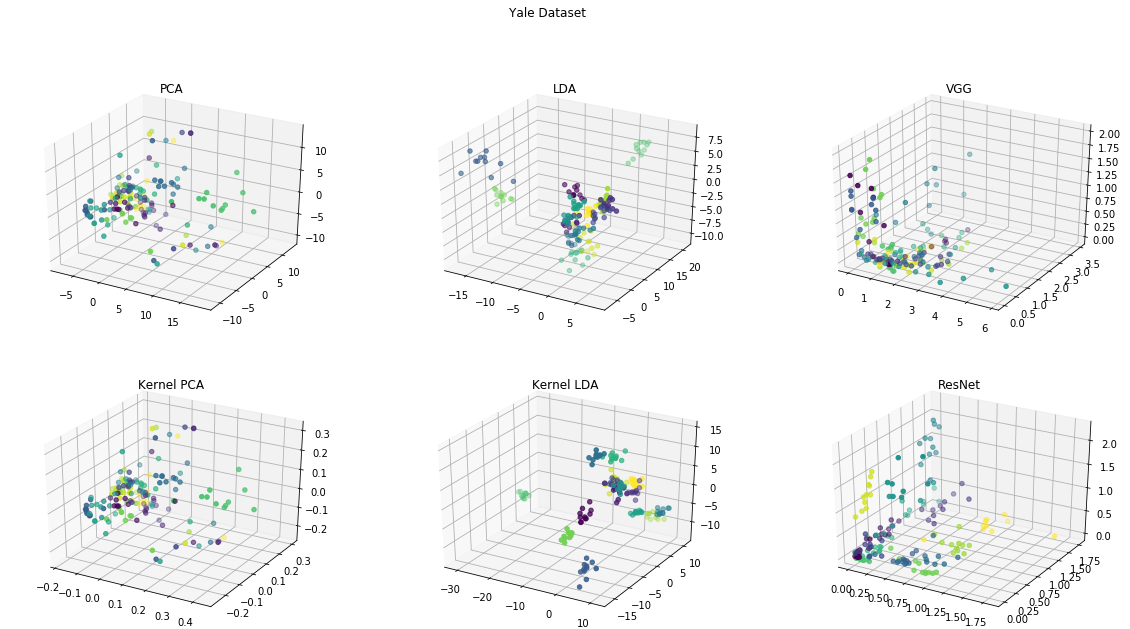

In [19]:
# Create a scatter plot  
# eg.
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(231, projection='3d')
ax.set_title("PCA")
ax.scatter(X_yale_pca[:,0],X_yale_pca[:,1],X_yale_pca[:,2],c=y_yale)

ax = fig.add_subplot(234, projection='3d')
ax.set_title("Kernel PCA")
ax.scatter(X_yale_kpca[:,0],X_yale_kpca[:,1],X_yale_kpca[:,2],c=y_yale)

ax = fig.add_subplot(232, projection='3d')
ax.set_title("LDA")
ax.scatter(X_yale_lda[:,0],X_yale_lda[:,1],X_yale_lda[:,2],c=y_yale)

ax = fig.add_subplot(235, projection='3d')
ax.set_title("Kernel LDA")
ax.scatter(X_yale_klda[:,0],X_yale_klda[:,1],X_yale_klda[:,2],c=y_yale)

ax = fig.add_subplot(233, projection='3d')
ax.set_title("VGG")
ax.scatter(X_yale_vgg[:,0],X_yale_vgg[:,1],X_yale_vgg[:,2],c=y_yale)

ax = fig.add_subplot(236, projection='3d')
ax.set_title("ResNet")
ax.scatter(X_yale_resnet[:,0],X_yale_resnet[:,1],X_yale_resnet[:,2],c=y_yale)
plt.suptitle("Yale Dataset")
plt.show()

The number of eigen values required for 95% variance of IMFDB is =  118


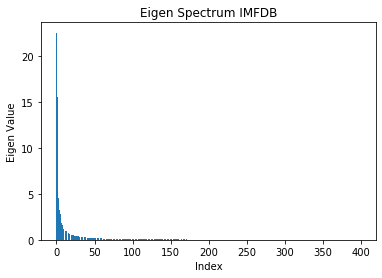

The number of eigen values required for 95% variance of CFW is =  304


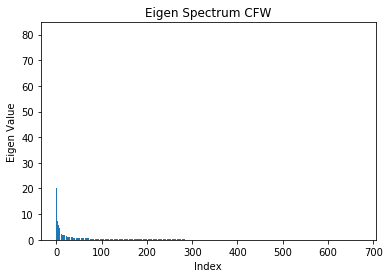

The number of eigen values required for 95% variance of Yale is =  61


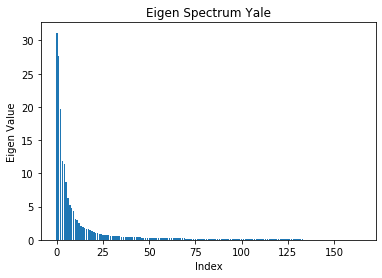

In [20]:
# Plot the eigen value spectrum 
eig_vals, eig_vecs = linalg.eig(np.cov(X_IMFDB.T))
eig_vals = np.abs(eig_vals)
k_IMFDB = len(np.where(np.round(0.95*np.sum(eig_vals)) >= np.cumsum(eig_vals))[0])
print('The number of eigen values required for 95% variance of IMFDB is = ',k_IMFDB)
plt.bar(np.arange(400), eig_vals[0:400])
plt.xlabel('Index')
plt.ylabel('Eigen Value')
plt.title('Eigen Spectrum IMFDB')
plt.show()

eig_vals, eig_vecs = linalg.eig(np.cov(X_CFW.T))
eig_vals = np.abs(eig_vals)
k_CFW = len(np.where(np.round(0.95*np.sum(eig_vals)) >= np.cumsum(eig_vals))[0])
print('The number of eigen values required for 95% variance of CFW is = ',k_CFW)
plt.bar(np.arange(672), eig_vals[0:672])
plt.xlabel('Index')
plt.ylabel('Eigen Value')
plt.title('Eigen Spectrum CFW')
plt.show()

eig_vals, eig_vecs = linalg.eig(np.cov(X_yale.T))
eig_vals = np.abs(eig_vals)
k_yale = len(np.where(np.round(0.95*np.sum(eig_vals)) >= np.cumsum(eig_vals))[0])
print('The number of eigen values required for 95% variance of Yale is = ',k_yale)
plt.bar(np.arange(165), eig_vals[0:165])
plt.xlabel('Index')
plt.ylabel('Eigen Value')
plt.title('Eigen Spectrum Yale')
plt.show()

1(c). Reconstruct  the  image  back for each case


In [21]:
def reconstruct_images(X, k):
    """
        Reconstruct the images back by just using the selected principal components. 


        You have to write the code in this code block.
        You can change the functions provided above (eg, get_pca, get_lda) for your use case. 
            
        @params: 
                Input parameters

        @return reconstructed_X => reconstructed image
        
    """
    
    _, reconstructed_X = get_pca(X, k)
#     _, reconstructed_X = get_kernel_pca(X, k)
    return reconstructed_X    

Dataset: IMFDB


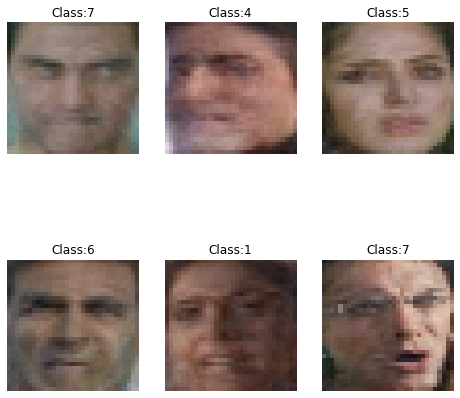

IMFDB reconstruction error = 0.03994329305802914
Dataset: CFW


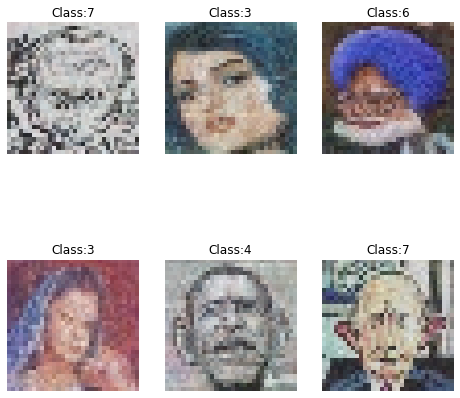

CFW reconstruction error = 0.06940636343670208
Dataset: Yale


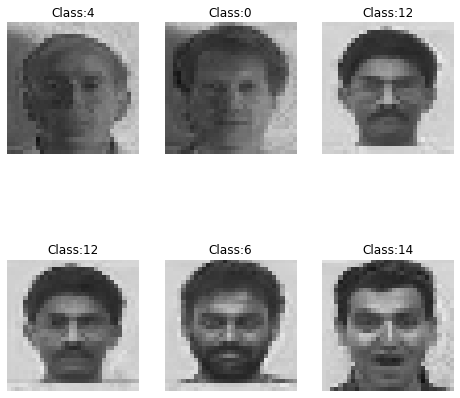

Yale reconstruction error = 0.054497993619897545


In [22]:
def reconstruction(X, y, N, H, W, C, k, dataset):
    print("Dataset:", dataset)
    # Display results 
    X_reconstructed = reconstruct_images(X, k)

    # Display random images
    ind = np.random.randint(0,y.shape[0],6)
    X_reconstructed_3D = X_reconstructed.reshape(N,H,W,C)
    X_reconstructed_3D = (X_reconstructed_3D - np.min(X_reconstructed_3D))/(np.max(X_reconstructed_3D)-np.min(X_reconstructed_3D))
    disply_images(X_reconstructed_3D[ind,...],y[ind],row=2,col=3)

    # Show the reconstruction error
    print(dataset, "reconstruction error =", np.sqrt(np.mean((X - X_reconstructed)**2)))
    return X_reconstructed

X_IMFDB_reconstructed_pca = reconstruction(X_IMFDB, y_IMFDB, N_IMFDB, H_IMFDB, W_IMFDB, C_IMFDB, k_IMFDB, "IMFDB")
X_CFW_reconstructed_pca = reconstruction(X_CFW, y_CFW, N_CFW, H_CFW, W_CFW, C_CFW, k_CFW, "CFW")
X_yale_reconstructed_pca = reconstruction(X_yale, y_yale, N_yale, H_yale, W_yale, C_yale, k_yale, "Yale")

1(d). Which person/identity is difficult to represent com-pactly with fewer eigen vectors?  Why is that?  Explain with your empirical observations and intuitive answers

In [23]:
# code goes here
def max_reconstruction_error(X, X_reconstructed, y, dataset, id_dict):
    print("Dataset: ", dataset)
    errors = np.zeros(len(id_dict))
    for i in range(len(id_dict)):
        errors[i] = np.sqrt(np.mean((X[y==i, :] - X_reconstructed[y==i, :])**2))
    max_idx = np.argmax(errors)
    print("Class with max reconstruction error:", list(id_dict.keys())[max_idx])
    
    
yale_dict = {}
for i in range(15):
    yale_dict[str(i)] = i
    
max_reconstruction_error(X_IMFDB, X_IMFDB_reconstructed_pca, y_IMFDB, "IMFDB", imfdb_dict)
max_reconstruction_error(X_CFW, X_CFW_reconstructed_pca, y_CFW, "CFW", cfw_dict)
max_reconstruction_error(X_yale, X_yale_reconstructed_pca, y_yale, "Yale", yale_dict)

Dataset:  IMFDB
Class with max reconstruction error: AkshayKumar
Dataset:  CFW
Class with max reconstruction error: AamirKhan
Dataset:  Yale
Class with max reconstruction error: 14


2(a). Use any classifier(MLP, Logistic regression, SVM, Decision Trees) and find the classification accuracy. 

2(b)Which method works well? Do a comparitivestudy. 


You already know the paper [Face Recognition Us-ing  Kernel  Methods](!http://face-rec.org/algorithms/Kernel/nips01.pdf) .See  this  as  an  example for empirical analysis of different features/classification.

In [24]:
# Define your classifier here. You can use libraries like sklearn to create your classifier 

class Classifier():
    def __init__(self):
        super().__init__()
        self.clf = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, solver = 'adam', activation='relu')
    
    # Define your parameters eg, W,b, max_iterations etc. 
    
    def classify(self,X):
        """
            Given an input X classify it into appropriate class. 
        """
        prediction = self.clf.predict(X)
        return prediction
        
    def confusion_matrix(self,pred,y):
        """
            A confusion matrix is a table that is often used to describe the performance of a classification
            model (or “classifier”) on a set of test data for which the true values are known.
            
            
            @return confusion_matrix => num_classesxnum_classes martix 
                where confusion_matrix[i,j] = number of prediction which are i and number of ground truth value equal j 
        
        """
        return confusion_matrix(pred, y)
        
    def train(self,X_train,y_train):
        """
            Given your training data, learn the parameters of your classifier
            
            @param X_train => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier will be trained. 
                                It can be any combination of features provided above.

            @param y_train => N vector. Ground truth label 
    
            @return Nothing
        """
        self.clf.fit(X_train, y_train)
        
    def validate(self, X_train, y_train, X_validate,y_validate):
        """
            How good is the classifier on unseen data? Use the function below to calculate different metrics. 
            Based on these matrix change the hyperparmeters and judge the classification
            
            @param X_validate => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier validated. 
                                It can be any combination of features provided above.

            @param y_validate => N vector. Ground truth label 
            
        """
        self.train(X_train, y_train)
        pred = self.classify(X_validate)
        
        # Create a confusion matrix
        conf_mat = self.confusion_matrix(pred, y_validate)
        
        # Calculate Validation accuracy 
        acc = self.clf.score(X_validate, y_validate)
    
        # Calculate precision and recall 
        prec = precision_score(y_validate, pred, average='macro')
        rec = recall_score(y_validate, pred, average='macro')
        
        # Calculate F1-score
        f1 = f1_score(y_validate, pred, average='macro')
    
        return conf_mat, acc, prec, rec, f1

In [25]:
# Create a train and validation split to train your classifier
def split_data(data, labels, test_size=0.2, random_state=42):
    train_data, val_data, train_labels, val_labels = train_test_split(data, labels, test_size=test_size, random_state=random_state)
    return train_data, val_data, train_labels, val_labels

In [26]:
# Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced dimension space, classification error, accuracy, f1-score
conf_mat_dict = {}

def run_classifier(X_train, y_train, X_val, y_val, dataset, method):
    clf = Classifier()
    clf.train(X_train, y_train)
    conf_mat, acc, prec, rec, f1 = clf.validate(X_train, y_train, X_val, y_val)
    conf_mat_dict[str(dataset + " " + method)] = conf_mat
    return conf_mat, acc, prec, rec, f1

def projection(X_train, y_train, X_val, y_val, k, projection, dataset, method):
    if projection == "PCA":
        pca = PCA(n_components=k)
        X_train_k = pca.fit_transform(X_train)
        X_val_k = pca.transform(X_val)
    elif projection == 'KPCA':
        kpca = KernelPCA(n_components=k,kernel='rbf',degree=3, fit_inverse_transform=True)
        X_train_k = kpca.fit_transform(X_train)
        X_val_k = kpca.transform(X_val)
    elif projection == 'LDA':
        lda = LDA(n_components=k)
        X_train_k = lda.fit_transform(X_train, y_train)
        X_val_k = lda.transform(X_val)
    elif projection == 'KLDA':
        var_train = np.var(X_train)
        X_train_transformed= np.exp(-np.square(X_train - np.mean(X_train))/(2*var_train*var_train))
        var_val = np.var(X_val)
        X_val_transformed= np.exp(-np.square(X_val - np.mean(X_val))/(2*var_val*var_val))
        klda = LDA(n_components=k, solver='svd')
        X_train_k = klda.fit_transform(X_train_transformed, y_train)
        X_val_k = klda.transform(X_val_transformed)
    dim = X_train_k.shape[1]
    conf_mat, acc, prec, rec, f1 = run_classifier(X_train_k, y_train, X_val_k, y_val, dataset, method)
    
    return (dim, (1-acc)*100, acc*100, f1)
        

def get_stats(X, y, k_pca, k_lda, dataset):
    stats = []
    X_train, X_val, y_train, y_val = split_data(X, y)
    if dataset == "IMFDB":
        idx = 0
    elif dataset == "CFW":
        idx = 1
    else:
        idx = 2
    
    # pca
    stats.append(projection(X_train, y_train, X_val, y_val, k_pca, "PCA", dataset, "PCA"))
    
    # kpca
    stats.append(projection(X_train, y_train, X_val, y_val, k_pca, "KPCA", dataset, "KPCA"))
    
    # lda
    stats.append(projection(X_train, y_train, X_val, y_val, k_lda, "LDA", dataset, "LDA"))
    
    # klda
    stats.append(projection(X_train, y_train, X_val, y_val, k_lda, "KLDA", dataset, "KLDA"))
    
    # vgg
    X_train, X_val, y_train, y_val = split_data(get_vgg_features(dirpath[idx]), y)
    dim = X_train.shape[1]
    conf_mat, acc, prec, rec, f1 = run_classifier(X_train, y_train, X_val, y_val, dataset, "VGG")
    stats.append((dim, (1-acc)*100, acc*100, f1))
    
    # resnet
    X_train, X_val, y_train, y_val = split_data(get_resnet_features(dirpath[idx]), y)
    dim = X_train.shape[1]
    conf_mat, acc, prec, rec, f1 = run_classifier(X_train, y_train, X_val, y_val, dataset, "ResNet")
    stats.append((dim, (1-acc)*100, acc*100, f1))
    
    # vgg + pca
    X_train, X_val, y_train, y_val = split_data(get_vgg_features(dirpath[idx]), y)
    stats.append(projection(X_train, y_train, X_val, y_val, k_pca, "PCA", dataset, "VGG + PCA"))
    
    # vgg + lda
    X_train, X_val, y_train, y_val = split_data(get_vgg_features(dirpath[idx]), y)
    stats.append(projection(X_train, y_train, X_val, y_val, k_lda, "LDA", dataset, "VGG + LDA"))
    
    # resnet + pca
    X_train, X_val, y_train, y_val = split_data(get_resnet_features(dirpath[idx]), y)
    stats.append(projection(X_train, y_train, X_val, y_val, k_pca, "PCA", dataset, "ResNet + PCA"))
    
    # resnet + lda
    X_train, X_val, y_train, y_val = split_data(get_resnet_features(dirpath[idx]), y)
    stats.append(projection(X_train, y_train, X_val, y_val, k_lda, "LDA", dataset, "ResNet + LDA"))
    
    return stats


# Print the table. (You can use Pandas)
stats_IMFDB = get_stats(X_IMFDB, y_IMFDB, k_IMFDB, 7, "IMFDB")
stats_CFW = get_stats(X_CFW, y_CFW, k_CFW, 7, "CFW")
stats_yale = get_stats(X_yale, y_yale, k_yale, 14, "Yale")

/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear."

In [27]:
projections = (['PCA', 'KPCA', 'LDA', 'KLDA', 'VGG', 'ResNet', 'VGG + PCA', 'VGG + LDA', 'ResNet + PCA', 'ResNet + LDA'])
columns = (['Reduced Dimension', 'Error', 'Accuracy', 'F1-Score'])
df = pd.DataFrame(data=np.asarray(stats_IMFDB), index=projections, columns=columns)
print("IMFDB Dataset")
print(df)
print("\n")

df = pd.DataFrame(data=np.asarray(stats_CFW), index=projections, columns=columns)
print("CFW Dataset")
print(df)
print("\n")

df = pd.DataFrame(data=np.asarray(stats_yale), index=projections, columns=columns)
print("Yale Dataset")
print(df)
print("\n")

IMFDB Dataset
              Reduced Dimension  Error  Accuracy  F1-Score
PCA                       118.0  13.75     86.25  0.854113
KPCA                      118.0  16.25     83.75  0.836028
LDA                         7.0  20.00     80.00  0.800187
KLDA                        7.0  45.00     55.00  0.540880
VGG                      4096.0   8.75     91.25  0.914296
ResNet                   2048.0   3.75     96.25  0.957629
VGG + PCA                 118.0  10.00     90.00  0.904112
VGG + LDA                   7.0  26.25     73.75  0.726273
ResNet + PCA              118.0   6.25     93.75  0.939401
ResNet + LDA                7.0   5.00     95.00  0.954922


CFW Dataset
              Reduced Dimension      Error   Accuracy  F1-Score
PCA                       304.0  50.370370  49.629630  0.482968
KPCA                      304.0  49.629630  50.370370  0.495266
LDA                         7.0  63.703704  36.296296  0.372367
KLDA                        7.0  86.666667  13.333333  0.147242
VGG

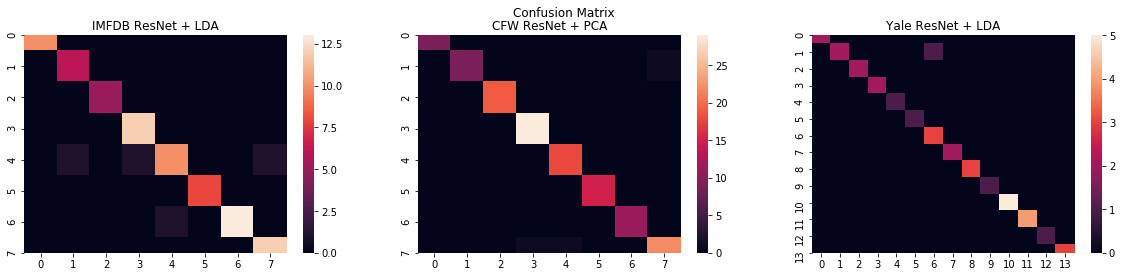

In [28]:
# For each dataset print the confusion matrix for the best model 
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(131)
ax = sn.heatmap(conf_mat_dict["IMFDB ResNet + LDA"])
ax.set_title("IMFDB ResNet + LDA")

ax = fig.add_subplot(132)
ax = sn.heatmap(conf_mat_dict["CFW ResNet + PCA"])
ax.set_title("CFW ResNet + PCA")

ax = fig.add_subplot(133)
sn.heatmap(conf_mat_dict["Yale ResNet + LDA"])
ax.set_title("Yale ResNet + LDA")
plt.suptitle("Confusion Matrix")
plt.show()

3. Similiar to 1(b) use t-SNE based visilization of faces?  Does it makesense?  Do you see similar people coming together?or something else?  Can you do visualization datasetwise and combined? Here you will use a popular implementation.(Worth  reading and understanding  t-SNE.  We  will not discuss it in the class and out of scope for thiscourse/exams.

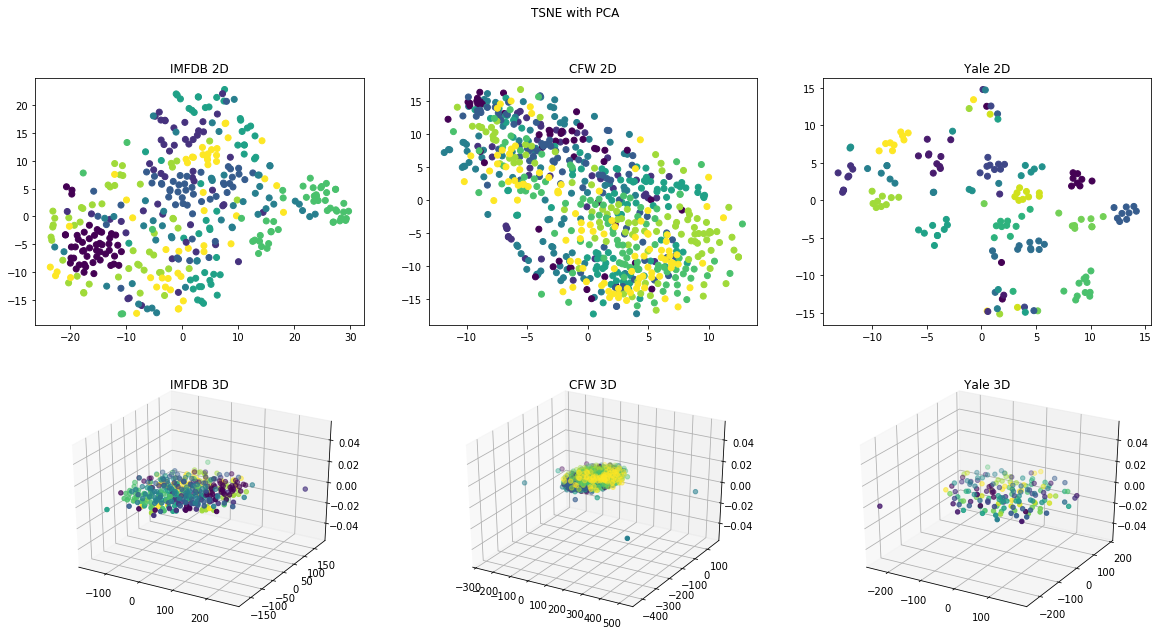

In [29]:
# Compute TSNE for different features and create a scatter plot

# X =  # feature 
# k = 2 # Number of components in TSNE

# Compute
X_IMFDB_pca, X_IMFDB_recon_pca = get_pca(X_IMFDB, k_IMFDB)
X_CFW_pca, X_CFW_recon_pca = get_pca(X_CFW, k_CFW)
X_Yale_pca, X_Yale_recon_pca = get_pca(X_yale, k_yale)

X_IMFDB_TSNE_2d = TSNE(n_components=2).fit_transform(X_IMFDB_pca)
X_CFW_TSNE_2d = TSNE(n_components=2).fit_transform(X_CFW_pca)
X_Yale_TSNE_2d = TSNE(n_components=2).fit_transform(X_Yale_pca)

X_IMFDB_TSNE_3d = TSNE(n_components=3).fit_transform(X_IMFDB_pca)
X_CFW_TSNE_3d = TSNE(n_components=3).fit_transform(X_CFW_pca)
X_Yale_TSNE_3d = TSNE(n_components=3).fit_transform(X_Yale_pca)

# Plot the representation in 2d/3d
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(231)
ax.scatter(X_IMFDB_TSNE_2d[:,0], X_IMFDB_TSNE_2d[:,1], c=y_IMFDB)
ax.set_title("IMFDB 2D")

ax = fig.add_subplot(232)
ax.scatter(X_CFW_TSNE_2d[:,0], X_CFW_TSNE_2d[:,1], c=y_CFW)
ax.set_title("CFW 2D")

ax = fig.add_subplot(233)
ax.scatter(X_Yale_TSNE_2d[:,0], X_Yale_TSNE_2d[:,1], c=y_yale)
ax.set_title("Yale 2D")

ax = fig.add_subplot(234, projection='3d')
ax.scatter(X_IMFDB_TSNE_3d[:,0], X_IMFDB_TSNE_3d[:,1], c=y_IMFDB)
ax.set_title("IMFDB 3D")

ax = fig.add_subplot(235, projection='3d')
ax.scatter(X_CFW_TSNE_3d[:,0], X_CFW_TSNE_3d[:,1], c=y_CFW)
ax.set_title("CFW 3D")

ax = fig.add_subplot(236, projection='3d')
ax.scatter(X_Yale_TSNE_3d[:,0], X_Yale_TSNE_3d[:,1], c=y_yale)
ax.set_title("Yale 3D")

plt.suptitle("TSNE with PCA")
plt.show()

/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


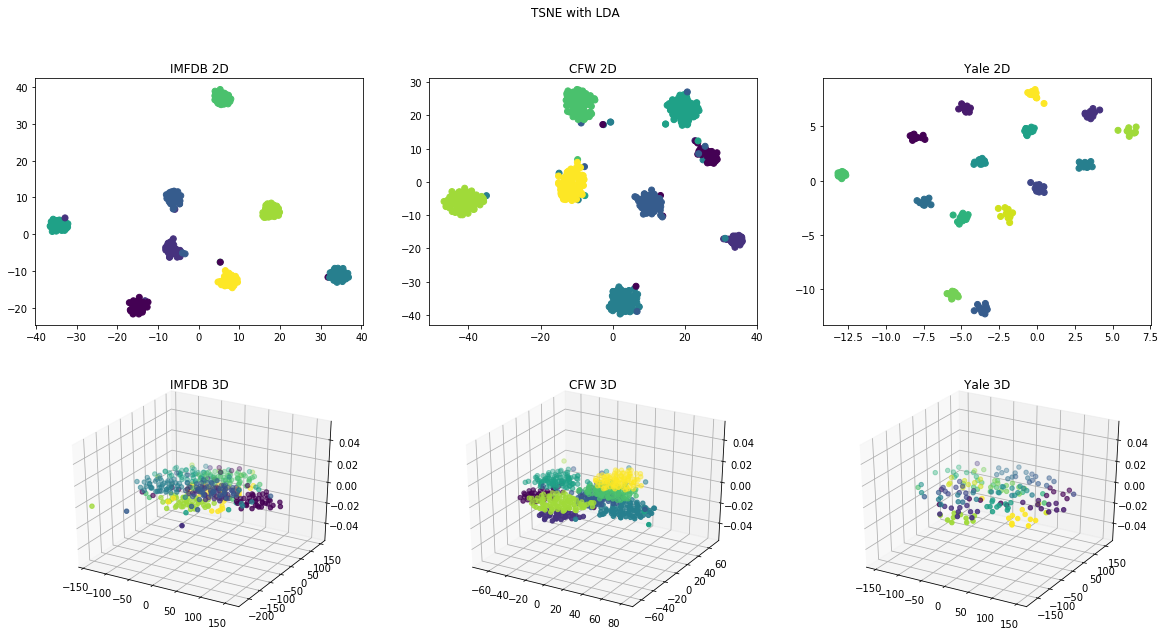

In [30]:
# Compute TSNE for different features and create a scatter plot

# X =  # feature 
# k = 2 # Number of components in TSNE

# Compute
X_IMFDB_lda = get_lda(X_IMFDB, y_IMFDB, 7)
X_CFW_lda = get_lda(X_CFW, y_CFW, 7)
X_Yale_lda = get_lda(X_yale, y_yale, 14)

X_IMFDB_TSNE_2d = TSNE(n_components=2).fit_transform(X_IMFDB_lda)
X_CFW_TSNE_2d = TSNE(n_components=2).fit_transform(X_CFW_lda)
X_Yale_TSNE_2d = TSNE(n_components=2).fit_transform(X_Yale_lda)

X_IMFDB_TSNE_3d = TSNE(n_components=3).fit_transform(X_IMFDB_lda)
X_CFW_TSNE_3d = TSNE(n_components=3).fit_transform(X_CFW_lda)
X_Yale_TSNE_3d = TSNE(n_components=3).fit_transform(X_Yale_lda)

# Plot the representation in 2d/3d
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(231)
ax.scatter(X_IMFDB_TSNE_2d[:,0], X_IMFDB_TSNE_2d[:,1], c=y_IMFDB)
ax.set_title("IMFDB 2D")

ax = fig.add_subplot(232)
ax.scatter(X_CFW_TSNE_2d[:,0], X_CFW_TSNE_2d[:,1], c=y_CFW)
ax.set_title("CFW 2D")

ax = fig.add_subplot(233)
ax.scatter(X_Yale_TSNE_2d[:,0], X_Yale_TSNE_2d[:,1], c=y_yale)
ax.set_title("Yale 2D")

ax = fig.add_subplot(234, projection='3d')
ax.scatter(X_IMFDB_TSNE_3d[:,0], X_IMFDB_TSNE_3d[:,1], c=y_IMFDB)
ax.set_title("IMFDB 3D")

ax = fig.add_subplot(235, projection='3d')
ax.scatter(X_CFW_TSNE_3d[:,0], X_CFW_TSNE_3d[:,1], c=y_CFW)
ax.set_title("CFW 3D")

ax = fig.add_subplot(236, projection='3d')
ax.scatter(X_Yale_TSNE_3d[:,0], X_Yale_TSNE_3d[:,1], c=y_yale)
ax.set_title("Yale 3D")

plt.suptitle("TSNE with LDA")
plt.show()

4.`face`  is  used  for  verification.   

4(a) How do we formulate the problem using KNN 

4(b) How do we analyze the performance ? suggest  the  metrics  (like  accuracy) that is appropriate for this task.

_______________________________________________________________________

4(c)Show empirical re-sults  with  all  the  representations

In [31]:
class FaceVerification():
    def __init__(self, k):
        super().__init__()
        self.clf = KNeighborsClassifier(n_neighbors=k)
    
    # Define your parameters eg, W,b, max_iterations etc. 
    
    def verify(self,X,class_id):
        """
            Given an input X find if the class id is correct or not.
            
            @return verfication_results => N vector containing True or False. 
                    If the class-id matches with your prediction then true else false.   
        """
        X = X.reshape(1, -1)
        pred = self.clf.predict(X)
        verification_results = (pred == class_id)
        
        return verfication_results
        
    def train(self,X_train,y_train):
        """
            Given your training data, learn the parameters of your classifier
            
            @param X_train => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your verification system will be trained. 
                                It can be any combination of features provided above.

            @param y_train => N vector. Ground truth label 
    
            @return Nothing
        """
        self.clf.fit(X_train, y_train)
        
    def validate(self,X_validate,y_validate):
        """
            How good is your system on unseen data? Use the function below to calculate different metrics. 
            Based on these matrix change the hyperparmeters
            
            @param X_validate => NxD tensor. Where N is the number of samples and D is the dimension. 
                                It can be any combination of features provided above.

            @param y_validate => N vector. Ground truth label 
            
        """
        pred = self.clf.predict(X_validate)
        acc = self.clf.score(X_validate, y_validate)
        prec = precision_score(y_validate, pred, average='macro')
        rec = recall_score(y_validate, pred, average='macro')
        f1 = f1_score(y_validate, pred, average='macro')
        return acc, prec

In [32]:
# Create a train and validation split and show your results 
def split_data(data, labels, test_size=0.2, random_state=42):
    train_data, val_data, train_labels, val_labels = train_test_split(data, labels, test_size=test_size, random_state=random_state)
    return train_data, val_data, train_labels, val_labels

In [33]:
# Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced dimension space, verification error, accuracy, precision
def run_KNN(X_train, y_train, X_val, y_val, k_neighbors):
    clf = FaceVerification(k_neighbors)
    clf.train(X_train, y_train)
    acc, prec = clf.validate(X_val, y_val)
    return acc, prec

def projection_KNN(X_train, y_train, X_val, y_val, k, k_neighbors, projection):
    if projection == "PCA":
        pca = PCA(n_components=k)
        X_train_k = pca.fit_transform(X_train)
        X_val_k = pca.transform(X_val)
#         X_train_k, _ = get_pca(X_train, k)
#         X_val_k, _ = get_pca(X_val, k)
    elif projection == 'KPCA':
        kpca = KernelPCA(n_components=k,kernel='rbf',degree=3, fit_inverse_transform=True)
        X_train_k = kpca.fit_transform(X_train)
        X_val_k = kpca.transform(X_val)
    elif projection == 'LDA':
        lda = LDA(n_components=k)
        X_train_k = lda.fit_transform(X_train, y_train)
        X_val_k = lda.transform(X_val)
    elif projection == 'KLDA':
        var_train = np.var(X_train)
        X_train_transformed= np.exp(-np.square(X_train - np.mean(X_train))/(2*var_train*var_train))
        var_val = np.var(X_val)
        X_val_transformed= np.exp(-np.square(X_val - np.mean(X_val))/(2*var_val*var_val))
        klda = LDA(n_components=k, solver='svd')
        X_train_k = klda.fit_transform(X_train_transformed, y_train)
        X_val_k = klda.transform(X_val_transformed)
    dim = X_train_k.shape[1]
    acc, prec = run_KNN(X_train_k, y_train, X_val_k, y_val, k_neighbors)
    
    return (dim, (1-acc)*100, acc*100, prec)

def get_stats_KNN(X, y, k_pca, k_lda, k_neighbors, dataset):
    stats = []
    X_train, X_val, y_train, y_val = split_data(X, y)
    if dataset == "IMFDB":
        idx = 0
    elif dataset == "CFW":
        idx = 1
    else:
        idx = 2
    
    # none
    acc, prec = run_KNN(X_train, y_train, X_val, y_val, k_neighbors)
    dim = X_train.shape[1]
    stats.append((dim, (1-acc)*100, acc*100, prec))
    
    # pca
    stats.append(projection_KNN(X_train, y_train, X_val, y_val, k_pca, k_neighbors, "PCA"))
    
#     # kpca
#     stats.append(projection_KNN(X_train, y_train, X_val, y_val, k_pca, k_neighbors, "KPCA"))
    
    # lda
    stats.append(projection_KNN(X_train, y_train, X_val, y_val, k_lda, k_neighbors, "LDA"))
    
#     # klda
#     stats.append(projection_KNN(X_train, y_train, X_val, y_val, k_lda, k_neighbors, "KLDA"))
    
    # vgg
    X_train, X_val, y_train, y_val = split_data(get_vgg_features(dirpath[idx]), y)
    dim = X_train.shape[1]
    acc, prec = run_KNN(X_train, y_train, X_val, y_val, k_neighbors)
    stats.append((dim, (1-acc)*100, acc*100, prec))
    
    # resnet
    X_train, X_val, y_train, y_val = split_data(get_resnet_features(dirpath[idx]), y)
    dim = X_train.shape[1]
    acc, prec = run_KNN(X_train, y_train, X_val, y_val, k_neighbors)
    stats.append((dim, (1-acc)*100, acc*100, prec))
    
    # vgg + pca
    X_train, X_val, y_train, y_val = split_data(get_vgg_features(dirpath[idx]), y)
    stats.append(projection_KNN(X_train, y_train, X_val, y_val, k_pca, k_neighbors, "PCA"))
    
    # vgg + lda
    X_train, X_val, y_train, y_val = split_data(get_vgg_features(dirpath[idx]), y)
    stats.append(projection_KNN(X_train, y_train, X_val, y_val, k_lda, k_neighbors, "LDA"))
    
    # resnet + pca
    X_train, X_val, y_train, y_val = split_data(get_resnet_features(dirpath[idx]), y)
    stats.append(projection_KNN(X_train, y_train, X_val, y_val, k_pca, k_neighbors, "PCA"))
    
    # resnet + lda
    X_train, X_val, y_train, y_val = split_data(get_resnet_features(dirpath[idx]), y)
    stats.append(projection_KNN(X_train, y_train, X_val, y_val, k_lda, k_neighbors, "LDA"))
    return stats

# Print the table. (You can use Pandas)
projections_KNN = (['None', 'PCA', 'LDA', 'VGG', 'ResNet', 'VGG + PCA', 'VGG + LDA', 'ResNet + PCA', 'ResNet + LDA'])

stats_IMFDB_KNN = get_stats_KNN(X_IMFDB, y_IMFDB, k_IMFDB, 7, 3, "IMFDB")
stats_CFW_KNN = get_stats_KNN(X_CFW, y_CFW, k_CFW, 7, 3, "CFW")
stats_yale_KNN = get_stats_KNN(X_yale, y_yale, k_yale, 14, 3, "Yale")

k_range = range(1, 12, 2)
accuracy_scores_IMFDB = [[] for i in range(len(projections_KNN))]
for k in k_range:
    stats = get_stats_KNN(X_IMFDB, y_IMFDB, k_IMFDB, 7, k, "IMFDB")
    for i in range(len(projections_KNN)):
        acc = stats[i][2]
        accuracy_scores_IMFDB[i].append(acc)

accuracy_scores_CFW = [[] for i in range(len(projections_KNN))]
for k in k_range:
    stats = get_stats_KNN(X_CFW, y_CFW, k_CFW, 7, k, "CFW")
    for i in range(len(projections_KNN)):
        acc = stats[i][2]
        accuracy_scores_CFW[i].append(acc)

accuracy_scores_yale = [[] for i in range(len(projections_KNN))]
for k in k_range:
    stats = get_stats_KNN(X_yale, y_yale, k_yale, 14, k, "Yale")
    for i in range(len(projections_KNN)):
        acc = stats[i][2]
        accuracy_scores_yale[i].append(acc)

/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/eesha/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/eesha/.local/

/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear."

/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/eesha/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/eesha/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/eesha/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-de

/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/eesha/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/eesha/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/eesha/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-de

/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/eesha/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/eesha/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/eesha/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F

In [34]:
# projections = (['None', 'PCA', 'KPCA', 'LDA', 'KLDA', 'VGG', 'ResNet', 'VGG + PCA', 'VGG + LDA', 'ResNet + PCA', 'ResNet + LDA'])
projections_KNN = (['None', 'PCA', 'LDA', 'VGG', 'ResNet', 'VGG + PCA', 'VGG + LDA', 'ResNet + PCA', 'ResNet + LDA'])
columns_KNN = (['Reduced Dimension', 'Error', 'Accuracy', 'Precision'])

print(np.asarray(stats_IMFDB_KNN).shape)
df = pd.DataFrame(data=np.asarray(stats_IMFDB_KNN), index=projections_KNN, columns=columns_KNN)
print("IMFDB Dataset: k=3")
print(df)
print("\n")

print(np.asarray(stats_IMFDB_KNN).shape)
df = pd.DataFrame(data=np.asarray(stats_CFW_KNN), index=projections_KNN, columns=columns_KNN)
print("CFW Dataset: k=3")
print(df)
print("\n")

print(np.asarray(stats_yale_KNN).shape)
df = pd.DataFrame(data=np.asarray(stats_yale_KNN), index=projections_KNN, columns=columns_KNN)
print("Yale Dataset: k=3")
print(df)
print("\n")

(9, 4)
IMFDB Dataset: k=3
              Reduced Dimension  Error  Accuracy  Precision
None                     3072.0  42.50     57.50   0.688767
PCA                       118.0  41.25     58.75   0.696801
LDA                         7.0  18.75     81.25   0.821622
VGG                      4096.0   8.75     91.25   0.908780
ResNet                   2048.0   5.00     95.00   0.954545
VGG + PCA                 118.0   8.75     91.25   0.908780
VGG + LDA                   7.0  27.50     72.50   0.728896
ResNet + PCA              118.0   5.00     95.00   0.954545
ResNet + LDA                7.0   6.25     93.75   0.944643


(9, 4)
CFW Dataset: k=3
              Reduced Dimension      Error   Accuracy  Precision
None                     3072.0  67.407407  32.592593   0.477535
PCA                       304.0  67.407407  32.592593   0.410100
LDA                         7.0  68.888889  31.111111   0.320640
VGG                      4096.0  32.592593  67.407407   0.663551
ResNet                 

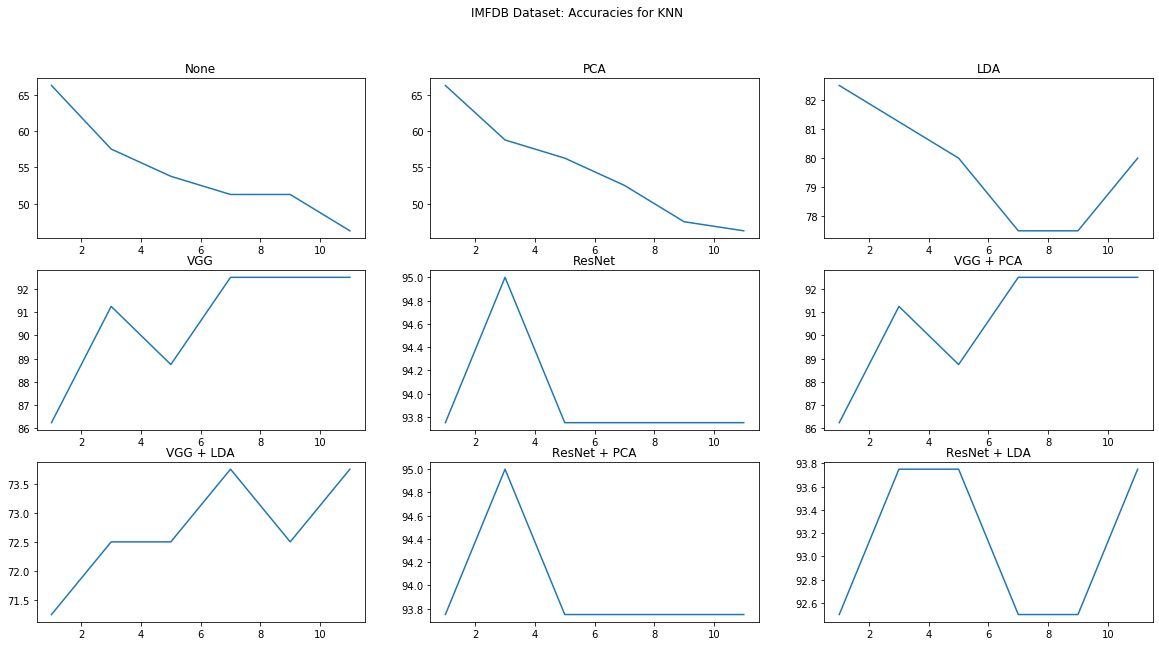

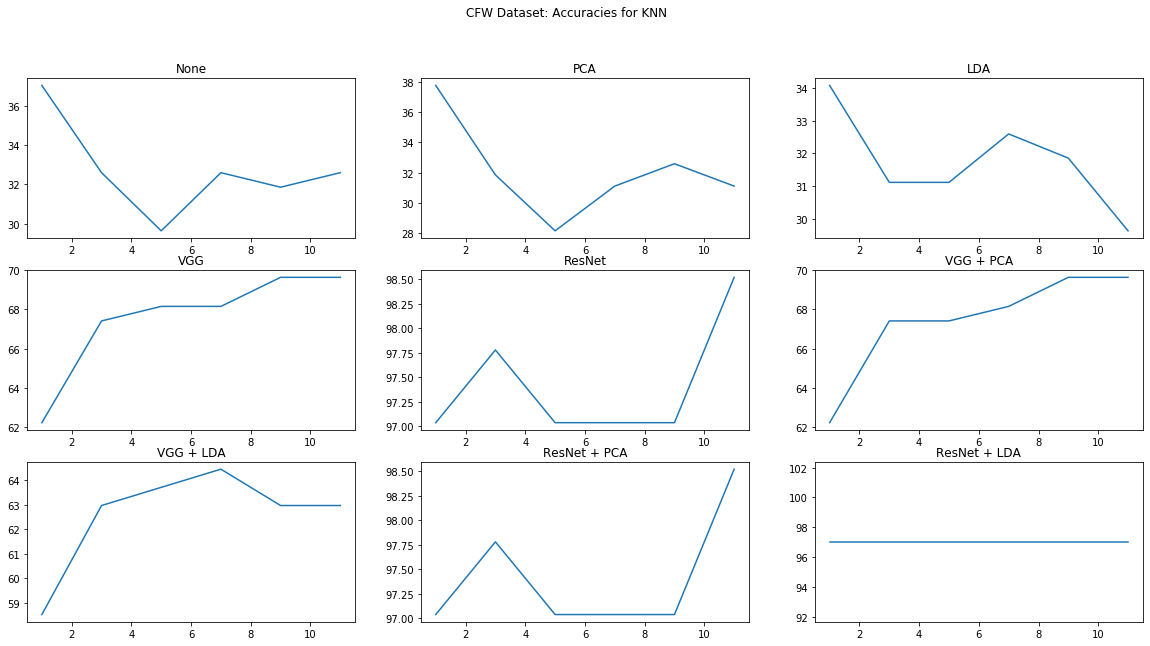

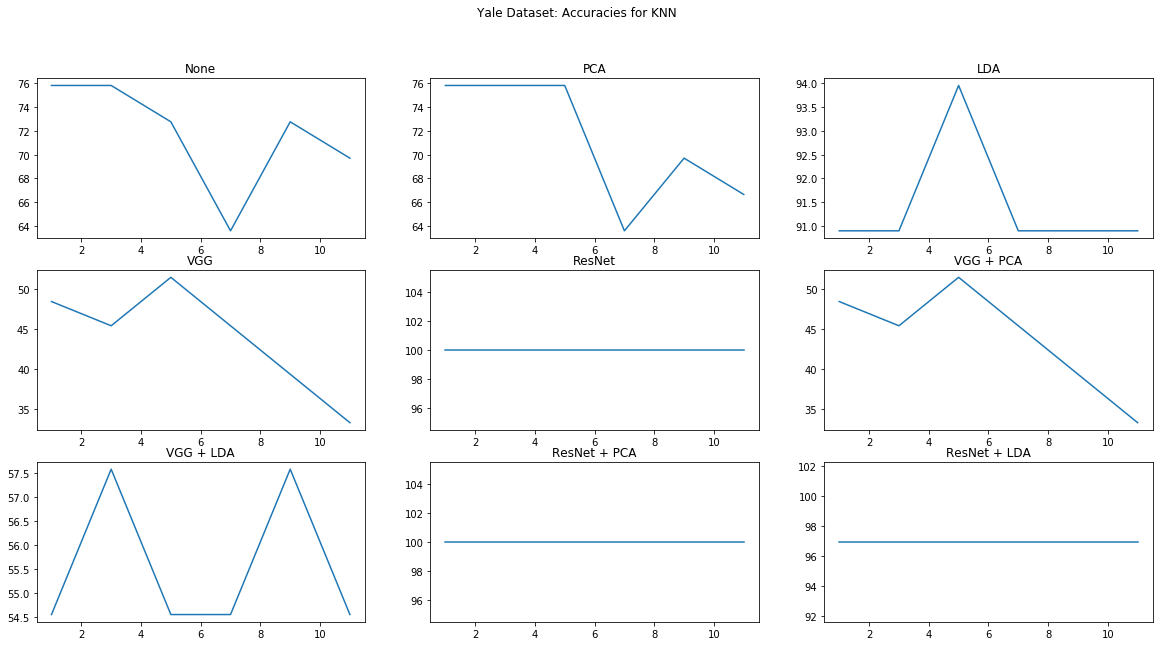

In [35]:
# plots for variations in k with deifferent methods 
fig = plt.figure(figsize=(20, 10)) 
for i in range(len(projections_KNN)):        
    ax = fig.add_subplot(3, 3, i+1)
    ax.plot(k_range, accuracy_scores_IMFDB[i])
    ax.set_title(projections_KNN[i])
plt.suptitle("IMFDB Dataset: Accuracies for KNN")
plt.show()

fig = plt.figure(figsize=(20, 10)) 
for i in range(len(projections_KNN)):        
    ax = fig.add_subplot(3, 3, i+1)
    ax.plot(k_range, accuracy_scores_CFW[i])
    ax.set_title(projections_KNN[i])
plt.suptitle("CFW Dataset: Accuracies for KNN")
plt.show()

fig = plt.figure(figsize=(20, 10)) 
for i in range(len(projections_KNN)):        
    ax = fig.add_subplot(3, 3, i+1)
    ax.plot(k_range, accuracy_scores_yale[i])
    ax.set_title(projections_KNN[i])
plt.suptitle("Yale Dataset: Accuracies for KNN")
plt.show()

### Extenstion / Application
    Create a system for any one of the following problems:

- Politicians  vs  Filmstars  in  a  public  data  set.   (eg.LFW)
        You already have seen IIIT-CFW dataset. Use it for classification. 
- Age prediction
        Given different actors/actress in IMFDB create new labels based on their age.  
- Gender prediction
        Given different actors/actress in IMFDB+IIIT-CFW create new labels based on their gender.
- Emotion classification
        Both the yale dataset and IMFDB contain an `emotion.txt` file. Using that you can create a emotion predicter 
- cartoon vs real images
        Use a combination of IIIT-CFW and other dataset. 
        


You are free to use a new dataset that is publicly avail-able or even create one by crawling from internet.

### Gender Classification on IIIT-CFW and IMFDB dataset

- Gender based classification
- `0` for `males` and `1` for `females`

Dataset shape: (400, 32, 32, 3)
Dataset shape: (672, 32, 32, 3)


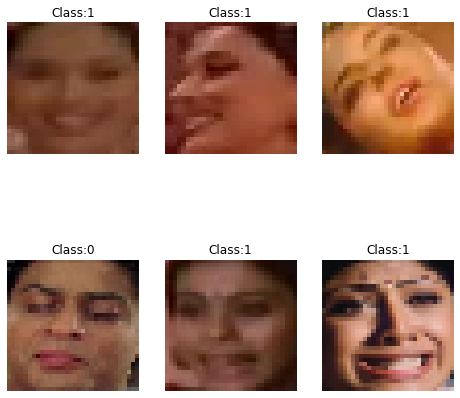

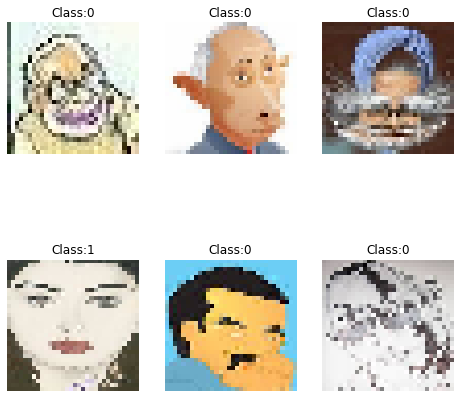

In [36]:
# Load data
cfw_gender_dict = {'Amitabhbachan': 0,
    'AamirKhan': 0,
    'DwayneJohnson': 0,
    'AishwaryaRai': 1,
    'BarackObama': 0,
    'NarendraModi': 0,
    'ManmohanSingh': 0,
    'VladimirPutin': 0}

imfdb_gender_dict = {'MadhuriDixit': 1,
     'Kajol': 1,
     'SharukhKhan': 0,
     'ShilpaShetty': 1,
     'AmitabhBachan': 0,
     'KatrinaKaif': 1,
     'AkshayKumar': 0,
     'Amir': 0}

# Load Image using PIL for dataset
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

# Load the full data from directory
def load_data(dir_path):
    image_list = []
    y_list = []
    
    if "CFW" in dir_path:
        label_dict = cfw_gender_dict
    elif "IMFDB" in dir_path:
        label_dict = imfdb_gender_dict
    else:
        raise KeyError("Dataset not found.")
    
    
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue

    image_list = np.array(image_list)
    y_list = np.array(y_list)

    print("Dataset shape:",image_list.shape)

    return image_list,y_list

# Display N Images in a nice format
def disply_images(imgs,classes,row=1,col=2,w=64,h=64):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

# Loading the dataset
dirpath = ['./dataset/IMFDB/', './dataset/IIIT-CFW/', './dataset/Yale_face_database/']
X_gender_IMFDB,y_gender_IMFDB = load_data(dirpath[0])
N_gender_IMFDB,H_gender_IMFDB,W_gender_IMFDB = X_gender_IMFDB.shape[0:3]
C_gender_IMFDB = 1 if opt['is_grayscale'] else X_gender_IMFDB.shape[3]

X_gender_CFW,y_gender_CFW = load_data(dirpath[1])
N_gender_CFW,H_gender_CFW,W_gender_CFW = X_gender_CFW.shape[0:3]
C_gender_CFW = 1 if opt['is_grayscale'] else X_gender_CFW.shape[3]

# Show sample images
ind = np.random.randint(0,y_gender_IMFDB.shape[0],6)
disply_images(X_gender_IMFDB[ind,...],y_gender_IMFDB[ind], row=2,col=3)

ind = np.random.randint(0,y_gender_CFW.shape[0],6)
disply_images(X_gender_CFW[ind,...],y_gender_CFW[ind], row=2,col=3)

# Flatten to apply PCA/LDA
X_gender_IMFDB = X_gender_IMFDB.reshape((N_gender_IMFDB,H_gender_IMFDB*W_gender_IMFDB*C_gender_IMFDB))
X_gender_CFW = X_gender_CFW.reshape((N_gender_CFW,H_gender_CFW*W_gender_CFW*C_gender_CFW))

In [37]:
# Define your features

In [38]:
# Create your classifier
class Classifier():
    def __init__(self):
        super().__init__()
        self.clf = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, solver = 'adam', activation='relu')
    
    # Define your parameters eg, W,b, max_iterations etc. 
    
    def classify(self,X):
        """
            Given an input X classify it into appropriate class. 
        """
        prediction = self.clf.predict(X)
        return prediction
        
    def confusion_matrix(self,pred,y):
        """
            A confusion matrix is a table that is often used to describe the performance of a classification
            model (or “classifier”) on a set of test data for which the true values are known.
            
            
            @return confusion_matrix => num_classesxnum_classes martix 
                where confusion_matrix[i,j] = number of prediction which are i and number of ground truth value equal j 
        
        """
        return confusion_matrix(pred, y)
        
    def train(self,X_train,y_train):
        """
            Given your training data, learn the parameters of your classifier
            
            @param X_train => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier will be trained. 
                                It can be any combination of features provided above.

            @param y_train => N vector. Ground truth label 
    
            @return Nothing
        """
        self.clf.fit(X_train, y_train)
        
    def validate(self, X_train, y_train, X_validate,y_validate):
        """
            How good is the classifier on unseen data? Use the function below to calculate different metrics. 
            Based on these matrix change the hyperparmeters and judge the classification
            
            @param X_validate => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier validated. 
                                It can be any combination of features provided above.

            @param y_validate => N vector. Ground truth label 
            
        """
        self.train(X_train, y_train)
        pred = self.classify(X_validate)
        
        # Create a confusion matrix
        conf_mat = self.confusion_matrix(pred, y_validate)
        
        # Calculate Validation accuracy 
        acc = self.clf.score(X_validate, y_validate)
    
        # Calculate precision and recall 
        prec = precision_score(y_validate, pred, average='macro')
        rec = recall_score(y_validate, pred, average='macro')
        
        # Calculate F1-score
        f1 = f1_score(y_validate, pred, average='macro')
    
        return conf_mat, acc, prec, rec, f1

# Validate your classifier

In [39]:
# Create a train and validation split to train your classifier
def split_data(data, labels, test_size=0.2, random_state=42):
    train_data, val_data, train_labels, val_labels = train_test_split(data, labels, test_size=test_size, random_state=random_state)
    return train_data, val_data, train_labels, val_labels

In [40]:
# Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced dimension space, classification error, accuracy, f1-score
conf_mat_dict = {}

def run_classifier(X_train, y_train, X_val, y_val, dataset, method):
    clf = Classifier()
    clf.train(X_train, y_train)
    conf_mat, acc, prec, rec, f1 = clf.validate(X_train, y_train, X_val, y_val)
    conf_mat_dict[str(dataset + " " + method)] = conf_mat
    return conf_mat, acc, prec, rec, f1

def projection(X_train, y_train, X_val, y_val, k, projection, dataset, method):
    if projection == "PCA":
        pca = PCA(n_components=k)
        X_train_k = pca.fit_transform(X_train)
        X_val_k = pca.transform(X_val)
    elif projection == 'KPCA':
        kpca = KernelPCA(n_components=k,kernel='rbf',degree=3, fit_inverse_transform=True)
        X_train_k = kpca.fit_transform(X_train)
        X_val_k = kpca.transform(X_val)
    elif projection == 'LDA':
        lda = LDA(n_components=k)
        X_train_k = lda.fit_transform(X_train, y_train)
        X_val_k = lda.transform(X_val)
    elif projection == 'KLDA':
        var_train = np.var(X_train)
        X_train_transformed= np.exp(-np.square(X_train - np.mean(X_train))/(2*var_train*var_train))
        var_val = np.var(X_val)
        X_val_transformed= np.exp(-np.square(X_val - np.mean(X_val))/(2*var_val*var_val))
        klda = LDA(n_components=k, solver='svd')
        X_train_k = klda.fit_transform(X_train_transformed, y_train)
        X_val_k = klda.transform(X_val_transformed)
    dim = X_train_k.shape[1]
    conf_mat, acc, prec, rec, f1 = run_classifier(X_train_k, y_train, X_val_k, y_val, dataset, method)
    
    return (dim, (1-acc)*100, acc*100, prec, f1)
        

def get_stats(X, y, k_pca, k_lda, dataset):
    stats = []
    X_train, X_val, y_train, y_val = split_data(X, y)
    if dataset == "IMFDB":
        idx = 0
    elif dataset == "CFW":
        idx = 1
    
    # pca
    stats.append(projection(X_train, y_train, X_val, y_val, k_pca, "PCA", dataset, "PCA"))
    
    # kpca
    stats.append(projection(X_train, y_train, X_val, y_val, k_pca, "KPCA", dataset, "KPCA"))
    
    # lda
    stats.append(projection(X_train, y_train, X_val, y_val, k_lda, "LDA", dataset, "LDA"))
    
    # klda
    stats.append(projection(X_train, y_train, X_val, y_val, k_lda, "KLDA", dataset, "KLDA"))
    
    # vgg
    X_train, X_val, y_train, y_val = split_data(get_vgg_features(dirpath[idx]), y)
    dim = X_train.shape[1]
    conf_mat, acc, prec, rec, f1 = run_classifier(X_train, y_train, X_val, y_val, dataset, "VGG")
    stats.append((dim, (1-acc)*100, acc*100, prec, f1))
    
    # resnet
    X_train, X_val, y_train, y_val = split_data(get_resnet_features(dirpath[idx]), y)
    dim = X_train.shape[1]
    conf_mat, acc, prec, rec, f1 = run_classifier(X_train, y_train, X_val, y_val, dataset, "ResNet")
    stats.append((dim, (1-acc)*100, acc*100, prec, f1))
    
    # vgg + pca
    X_train, X_val, y_train, y_val = split_data(get_vgg_features(dirpath[idx]), y)
    stats.append(projection(X_train, y_train, X_val, y_val, k_pca, "PCA", dataset, "VGG + PCA"))
    
    # vgg + lda
    X_train, X_val, y_train, y_val = split_data(get_vgg_features(dirpath[idx]), y)
    stats.append(projection(X_train, y_train, X_val, y_val, k_lda, "LDA", dataset, "VGG + LDA"))
    
    # resnet + pca
    X_train, X_val, y_train, y_val = split_data(get_resnet_features(dirpath[idx]), y)
    stats.append(projection(X_train, y_train, X_val, y_val, k_pca, "PCA", dataset, "ResNet + PCA"))
    
    # resnet + lda
    X_train, X_val, y_train, y_val = split_data(get_resnet_features(dirpath[idx]), y)
    stats.append(projection(X_train, y_train, X_val, y_val, k_lda, "LDA", dataset, "ResNet + LDA"))
    
    return stats


# Print the table. (You can use Pandas)
stats_gender_IMFDB = get_stats(X_gender_IMFDB, y_gender_IMFDB, k_IMFDB, 1, "IMFDB")
stats_gender_CFW = get_stats(X_gender_CFW, y_gender_CFW, k_CFW, 1, "CFW")

/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/eesha/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear."

In [41]:
# Show qualitative results such as accuracy, k-fold validation, TSNE/PCA/Isomap plots, etc.  
projections = (['PCA', 'KPCA', 'LDA', 'KLDA', 'VGG', 'ResNet', 'VGG + PCA', 'VGG + LDA', 'ResNet + PCA', 'ResNet + LDA'])
columns = (['Reduced Dimension', 'Error', 'Accuracy', 'Precision', 'F1-Score'])
df = pd.DataFrame(data=np.asarray(stats_gender_IMFDB), index=projections, columns=columns)
print("IMFDB Dataset")
print(df)
print("\n")

df = pd.DataFrame(data=np.asarray(stats_gender_CFW), index=projections, columns=columns)
print("CFW Dataset")
print(df)
print("\n")

IMFDB Dataset
              Reduced Dimension  Error  Accuracy  Precision  F1-Score
PCA                       118.0   8.75     91.25   0.915873  0.911825
KPCA                      118.0  10.00     90.00   0.901515  0.899434
LDA                         1.0  12.50     87.50   0.875000  0.874922
KLDA                        1.0  23.75     76.25   0.762099  0.761569
VGG                      4096.0   2.50     97.50   0.974937  0.974937
ResNet                   2048.0   0.00    100.00   1.000000  1.000000
VGG + PCA                 118.0   3.75     96.25   0.962164  0.962447
VGG + LDA                   1.0  16.25     83.75   0.837524  0.836863
ResNet + PCA              118.0   0.00    100.00   1.000000  1.000000
ResNet + LDA                1.0   1.25     98.75   0.988372  0.987451


CFW Dataset
              Reduced Dimension      Error   Accuracy  Precision  F1-Score
PCA                       304.0  14.814815  85.185185   0.801689  0.761821
KPCA                      304.0  14.074074  85.92592

In [42]:
# k-fold validation
kfolds = [4, 8, 12, 16]

def run_classifier(X_train, y_train, X_val, y_val):
    clf = Classifier()
    clf.train(X_train, y_train)
    conf_mat, acc, prec, rec, f1 = clf.validate(X_train, y_train, X_val, y_val)
    return conf_mat, acc, prec, rec, f1

def kfold_validation(X, y, k_pca, proj, dataset):
    stats = []
    for k in kfolds:
        kfold = KFold(k, True)
        acc_avg = 0
        f1_avg = 0
        tot = 0
        for train_ind, val_ind in kfold.split(X):
            X_train = X[train_ind]
            y_train = y[train_ind]
            X_val = X[val_ind]
            y_val = y[val_ind]
            pca = PCA(n_components=k_pca)
            X_train_k = pca.fit_transform(X_train)
            X_val_k = pca.transform(X_val)
            conf_mat, acc, prec, rec, f1 = run_classifier(X_train_k, y_train, X_val_k, y_val)
            acc_avg += acc
            f1_avg += f1
            tot += 1
        acc_avg /= tot
        err_avg = 1 - acc_avg
        f1_avg /= tot
        stats.append((err_avg*100, acc_avg*100, f1_avg))
    df = pd.DataFrame(data=np.asarray(stats), index=kfolds, columns=['Avg error', 'Avg acc', 'Avg F1'])
    return df

df = kfold_validation(X_gender_IMFDB, y_gender_IMFDB, k_IMFDB, 40, 'IMFDB')
print("IMFDB Dataset k-fold cross validation")
print(df)

df = kfold_validation(X_gender_CFW, y_gender_CFW, k_CFW, 40, 'CFW')
print("CFW Dataset k-fold cross validation")
print(df)

IMFDB Dataset k-fold cross validation
    Avg error    Avg acc    Avg F1
4   12.250000  87.750000  0.876175
8   11.500000  88.500000  0.883439
12  10.264409  89.735591  0.896102
16  11.750000  88.250000  0.879392
CFW Dataset k-fold cross validation
    Avg error    Avg acc    Avg F1
4   11.904762  88.095238  0.739235
8   12.648810  87.351190  0.737598
12  12.351190  87.648810  0.726424
16  12.946429  87.053571  0.724231


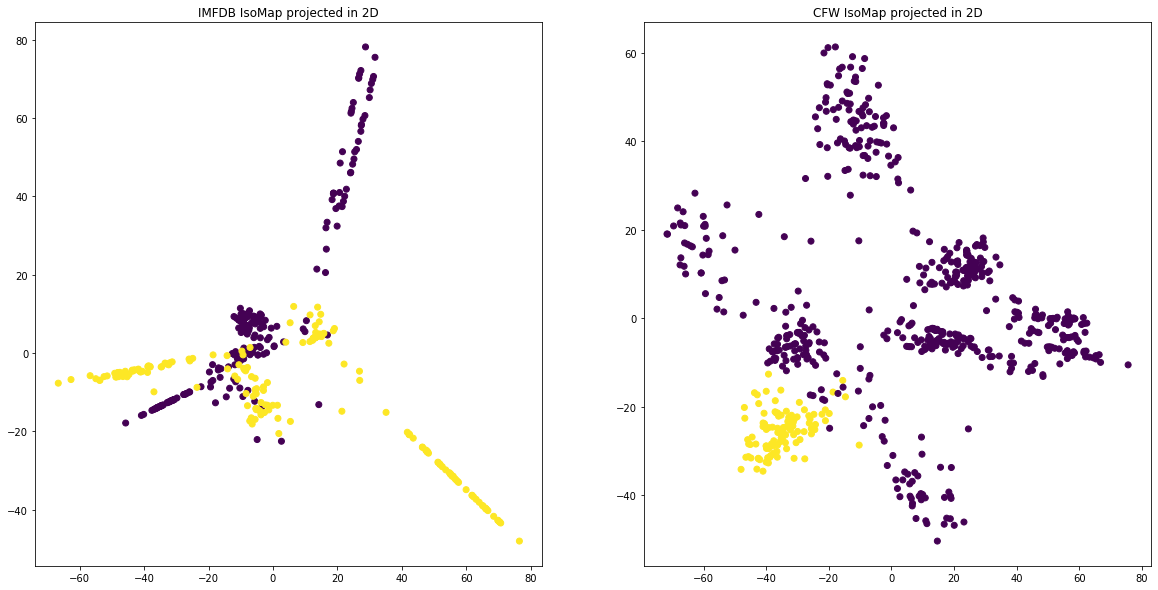

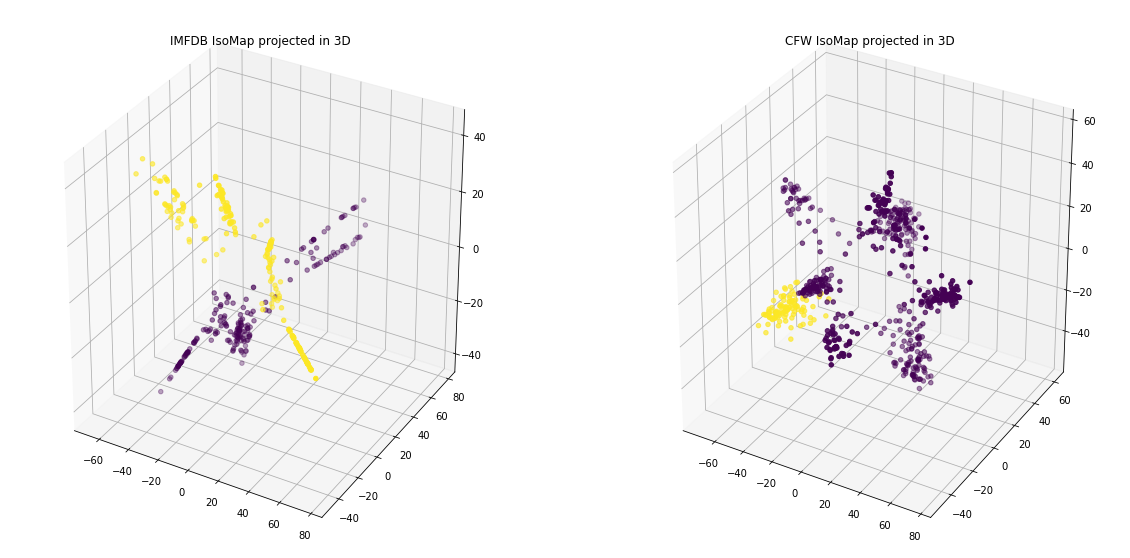

In [43]:
# IsoMap plots
def run_IsoMap(X, y, dataset, k, ax):
    X_Isomap = Isomap(n_components=k).fit_transform(X)
    if k == 2:
        ax.scatter(X_Isomap[:,0], X_Isomap[:,1], c=y)
        ax.set_title(dataset + " IsoMap projected in 2D")
    else:
        ax.scatter(X_Isomap[:,0], X_Isomap[:,1], X_Isomap[:,2], c=y)
        ax.set_title(dataset + " IsoMap projected in 3D")
    return ax

X_IMFDB_proj, _ = get_pca(get_resnet_features(dirpath[0]), k_IMFDB)
X_CFW_proj, _ = get_pca(get_resnet_features(dirpath[1]), k_CFW)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121)
ax = run_IsoMap(X_IMFDB_proj, y_gender_IMFDB, "IMFDB", 2, ax)
ax = fig.add_subplot(122)
ax = run_IsoMap(X_CFW_proj, y_gender_CFW, "CFW", 2, ax)
plt.show()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d')
ax = run_IsoMap(X_IMFDB_proj, y_gender_IMFDB, "IMFDB", 3, ax)
ax = fig.add_subplot(122, projection='3d')
ax = run_IsoMap(X_CFW_proj, y_gender_CFW, "CFW", 3, ax)
plt.show()

Correct Prediction for IMFDB


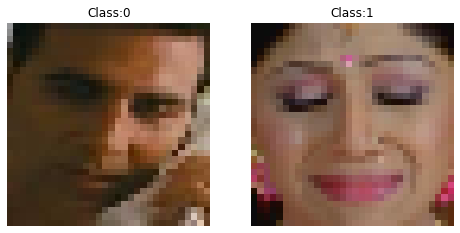

Wrong Prediction for IMFDB
Correct Labels = [0 0]
Wrong Labels = [1 1]


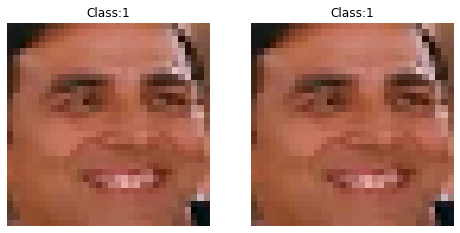

Correct Prediction for CFW


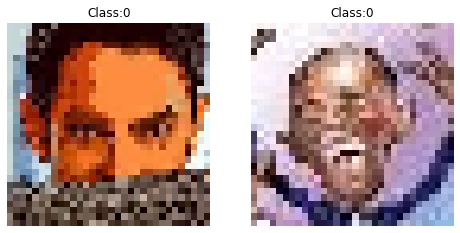

Wrong Prediction for CFW
Correct Labels = [1 1]
Wrong Labels = [0 0]


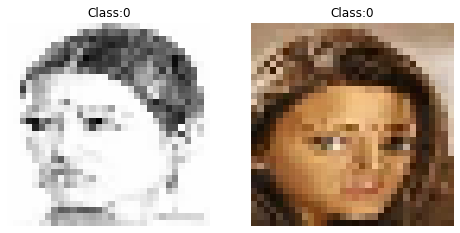

In [44]:
# Show quantitative results such as examples of correct prediction and wrong prediction
def quant_res(X, y, k, H, W, C, dataset):
    X_train, X_val, y_train, y_val = split_data(X, y)
    if dataset == "IMFDB":
        idx = 0
    elif dataset == "CFW":
        idx = 1
        
    X_ori_train, X_ori_val, y_train, y_val = split_data(X, y, test_size=0.5)
    X_train, X_val, y_train, y_val = split_data(get_resnet_features(dirpath[idx]), y, test_size=0.5)
    pca = PCA(n_components=k)
    X_train_k = pca.fit_transform(X_train)
    X_val_k = pca.transform(X_val)
    
    clf = Classifier()
    clf.train(X_train_k, y_train)
    pred = clf.classify(X_val_k)
    
    correct_pred = []
    wrong_pred = []
    
    for i in range(len(y_val)):
        if pred[i] == y_val[i]:
            correct_pred.append(i)
        else:
            wrong_pred.append(i)
    
    correct_pred = np.asarray(correct_pred)
    wrong_pred = np.asarray(wrong_pred)
    X_val = X_ori_val.reshape(X_val.shape[0], H, W, C)
    
    print("Correct Prediction for", dataset)
    ind = np.random.randint(0, correct_pred.shape[0], 2)
    disply_images(X_val[correct_pred[ind], ...], y_val[correct_pred[ind]], row=1, col=2)
    
    if (len(wrong_pred) == 0):
        print("No misclassification in", dataset)
        print("\n")
        return
    print("Wrong Prediction for", dataset)
    ind = np.random.randint(0, wrong_pred.shape[0], 2)
    print("Correct Labels =", y_val[wrong_pred[ind]])
    print("Wrong Labels =", pred[wrong_pred[ind]])
    disply_images(X_val[wrong_pred[ind], ...], pred[wrong_pred[ind]], row=1, col=2)
    
quant_res(X_gender_IMFDB, y_gender_IMFDB, k_IMFDB, H_gender_IMFDB, W_gender_IMFDB, C_gender_IMFDB, "IMFDB")
quant_res(X_gender_CFW, y_gender_CFW, k_CFW, H_gender_CFW, W_gender_CFW, C_gender_CFW, "CFW")